In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import optax
import equinox as eqx

from flex import FuzzyVariable
from flex.fiss import TSK
from flex.visualize import plot_mfs

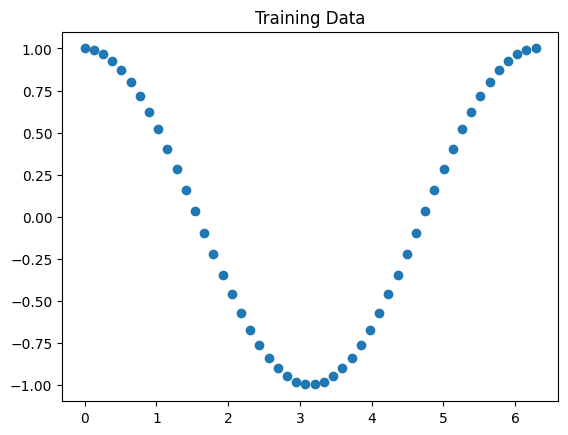

In [2]:
f = lambda x: np.cos(x)

xs = np.linspace(0.0, 2.0*np.pi, 50)
ys = f(xs)

plt.scatter(xs, ys)
plt.title("Training Data")
plt.show()

In [3]:
# define models

minval = 0.0
maxval = 2.0*jnp.pi

order = 0
key = jax.random.PRNGKey(0)

fv_tri = FuzzyVariable.ruspini(5, kind="triangle", name="Triangle FV")
fv_trap = FuzzyVariable.ruspini(5, kind="trapezoid", name="Trapezoid FV")
fv_gauss = FuzzyVariable.gaussian(5, name="Gaussian FV")
fv_mixed = FuzzyVariable.manual(
    mfs=["trapezoid", "gaussian", "triangle", "gaussian", "trapezoid"],
    name="Mixed FV",
)

fis1 = TSK.init((fv_tri,), order=order, key=key, name="Triangle FIS")
fis2 = TSK.init((fv_trap,), order=order, key=key, name="Trapezoid FIS")
fis3 = TSK.init((fv_gauss,), order=order, key=key, name="Gaussian FIS")
fis4 = TSK.init((fv_mixed,), order=order, key=key, name="Mixed FIS")

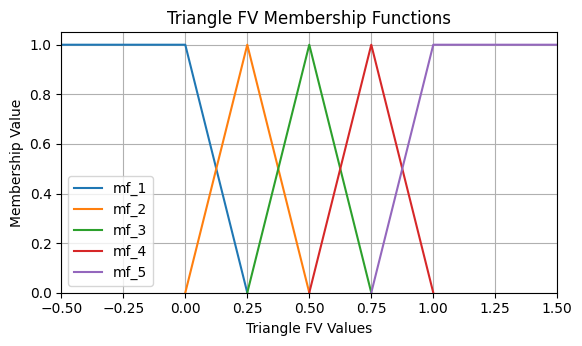

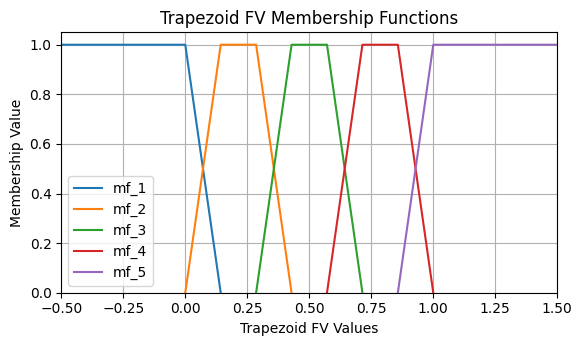

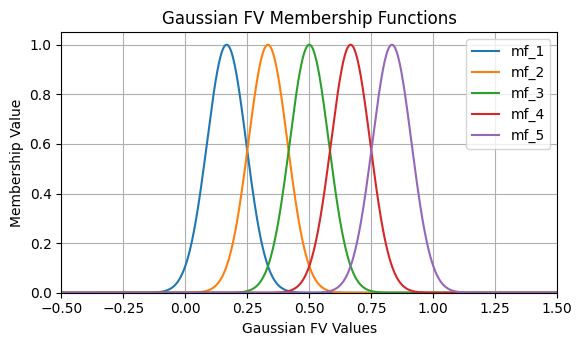

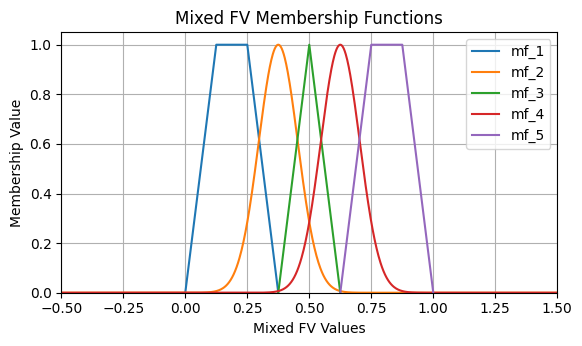

In [4]:
plot_mfs(fv_tri)
plot_mfs(fv_trap)
plot_mfs(fv_gauss)
plot_mfs(fv_mixed)

In [24]:
# Define training parameters
lr = 1e-1
epochs = 200

optim = optax.adam(learning_rate=lr)

@eqx.filter_value_and_grad
def loss_fn(model, x, y):
    pred_y = model(x).squeeze()
    return jnp.mean((y - pred_y)**2)

@eqx.filter_jit
def step(model, x, y, opt_state):
    loss, grads = loss_fn(model, x, y)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(model, updates)
    return loss, model, opt_state

train_xs = xs[:, None] / (2.0*np.pi)  # NOTE: last dim must be of the number of inputs

In [25]:
msg = f"Starting Training for {fis1.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis1)

for epoch in range(epochs):
    loss, fis1, opt_state = step(fis1, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis1.name} Training Finished!\n")

Starting Training for Triangle FIS
----------------------------------
epoch 1/200 | loss=0.0036104945465922356
epoch 2/200 | loss=0.029626403003931046
epoch 3/200 | loss=0.005328562576323748
epoch 4/200 | loss=0.00889695156365633
epoch 5/200 | loss=0.01825735718011856
epoch 6/200 | loss=0.015169286169111729
epoch 7/200 | loss=0.007370030041784048
epoch 8/200 | loss=0.0036744954995810986
epoch 9/200 | loss=0.006312971469014883
epoch 10/200 | loss=0.01023190375417471
epoch 11/200 | loss=0.010457136668264866
epoch 12/200 | loss=0.007268860004842281
epoch 13/200 | loss=0.004163127858191729
epoch 14/200 | loss=0.003772954223677516
epoch 15/200 | loss=0.005677413661032915
epoch 16/200 | loss=0.007173995021730661
epoch 17/200 | loss=0.006878736428916454
epoch 18/200 | loss=0.0052799684926867485
epoch 19/200 | loss=0.0038692306261509657
epoch 20/200 | loss=0.0036889284383505583
epoch 21/200 | loss=0.004607949871569872
epoch 22/200 | loss=0.005392760969698429
epoch 23/200 | loss=0.0051965904422

In [26]:
msg = f"Starting Training for {fis2.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis2)

for epoch in range(epochs):
    loss, fis2, opt_state = step(fis2, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis2.name} Training Finished!\n")

Starting Training for Trapezoid FIS
-----------------------------------
epoch 1/200 | loss=0.0009917273418977857
epoch 2/200 | loss=0.014334719628095627
epoch 3/200 | loss=0.0016025162767618895
epoch 4/200 | loss=0.005051429383456707
epoch 5/200 | loss=0.008663813583552837
epoch 6/200 | loss=0.005976845510303974
epoch 7/200 | loss=0.002234222600236535
epoch 8/200 | loss=0.0015064120525494218
epoch 9/200 | loss=0.0031865888740867376
epoch 10/200 | loss=0.004478153772652149
epoch 11/200 | loss=0.003951623570173979
epoch 12/200 | loss=0.0024628909304738045
epoch 13/200 | loss=0.0013316773111000657
epoch 14/200 | loss=0.0013634085189551115
epoch 15/200 | loss=0.0022318963892757893
epoch 16/200 | loss=0.0028145986143499613
epoch 17/200 | loss=0.0025025743525475264
epoch 18/200 | loss=0.00161288573872298
epoch 19/200 | loss=0.0009810535702854395
epoch 20/200 | loss=0.0011440488742664456
epoch 21/200 | loss=0.0017555400263518095
epoch 22/200 | loss=0.0020380306523293257
epoch 23/200 | loss=0.

In [27]:
msg = f"Starting Training for {fis3.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis3)

for epoch in range(epochs):
    loss, fis3, opt_state = step(fis3, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis3.name} Training Finished!\n")

Starting Training for Gaussian FIS
----------------------------------
epoch 1/200 | loss=0.00011288376117590815
epoch 2/200 | loss=0.013620981946587563
epoch 3/200 | loss=0.0035783483181148767
epoch 4/200 | loss=0.005413471255451441
epoch 5/200 | loss=0.0077704475261271
epoch 6/200 | loss=0.006776195485144854
epoch 7/200 | loss=0.0030448019970208406
epoch 8/200 | loss=0.00020644170581363142
epoch 9/200 | loss=0.002140582771971822
epoch 10/200 | loss=0.003997655585408211
epoch 11/200 | loss=0.0038365619257092476
epoch 12/200 | loss=0.0029102626722306013
epoch 13/200 | loss=0.0012999842874705791
epoch 14/200 | loss=0.00020626001060009003
epoch 15/200 | loss=0.001015747431665659
epoch 16/200 | loss=0.0020084609277546406
epoch 17/200 | loss=0.0018718009814620018
epoch 18/200 | loss=0.0014550063060596585
epoch 19/200 | loss=0.0009603602811694145
epoch 20/200 | loss=0.00040163964149542153
epoch 21/200 | loss=0.00046916454448364675
epoch 22/200 | loss=0.0009016486001200974
epoch 23/200 | loss

In [28]:
msg = f"Starting Training for {fis4.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis4)

for epoch in range(epochs):
    loss, fis4, opt_state = step(fis4, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis4.name} Training Finished!\n")

Starting Training for Mixed FIS
-------------------------------
epoch 1/200 | loss=0.0036967494525015354
epoch 2/200 | loss=0.008188461884856224
epoch 3/200 | loss=0.00522595876827836
epoch 4/200 | loss=0.005807278212159872
epoch 5/200 | loss=0.0024144041817635298
epoch 6/200 | loss=0.002621081192046404
epoch 7/200 | loss=0.004273552913218737
epoch 8/200 | loss=0.0030523494351655245
epoch 9/200 | loss=0.0015107968356460333
epoch 10/200 | loss=0.0017762606730684638
epoch 11/200 | loss=0.002432434121146798
epoch 12/200 | loss=0.0019590791780501604
epoch 13/200 | loss=0.00123089668340981
epoch 14/200 | loss=0.0013199433451518416
epoch 15/200 | loss=0.0017288976814597845
epoch 16/200 | loss=0.0015276714693754911
epoch 17/200 | loss=0.0009184525697492063
epoch 18/200 | loss=0.0007259965059347451
epoch 19/200 | loss=0.001035970519296825
epoch 20/200 | loss=0.0011780686909332871
epoch 21/200 | loss=0.0009115990833379328
epoch 22/200 | loss=0.0006776247173547745
epoch 23/200 | loss=0.000740229

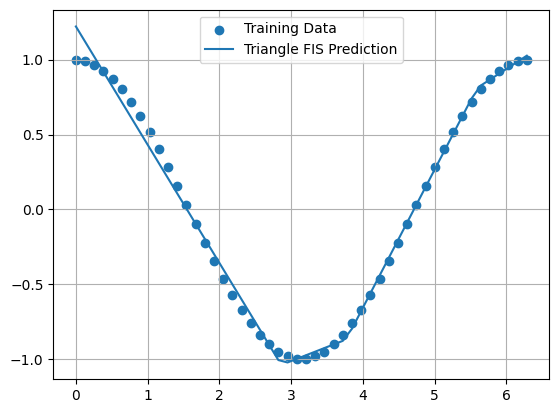

In [29]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis1(train_xs), label=f"{fis1.name} Prediction")
plt.grid()
plt.legend()
plt.show()

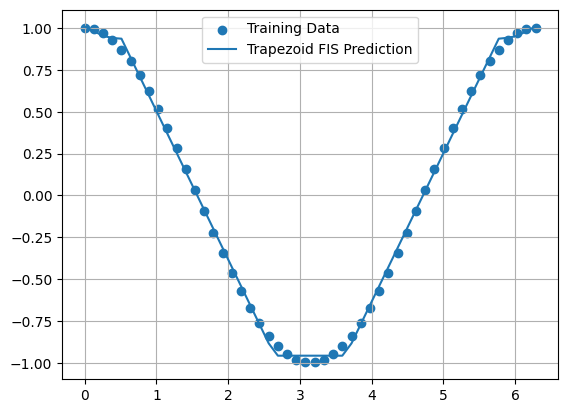

In [30]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis2(train_xs), label=f"{fis2.name} Prediction")
plt.grid()
plt.legend()
plt.show()

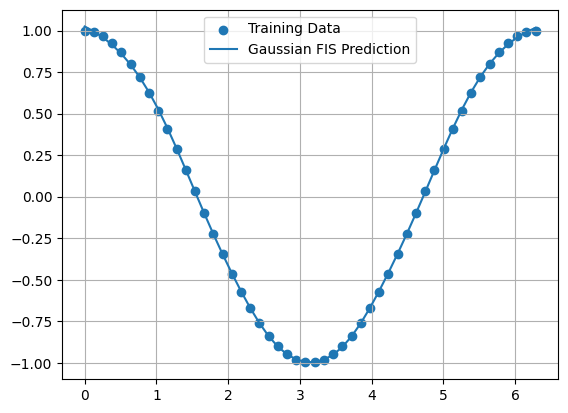

In [31]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis3(train_xs), label=f"{fis3.name} Prediction")
plt.grid()
plt.legend()
plt.show()

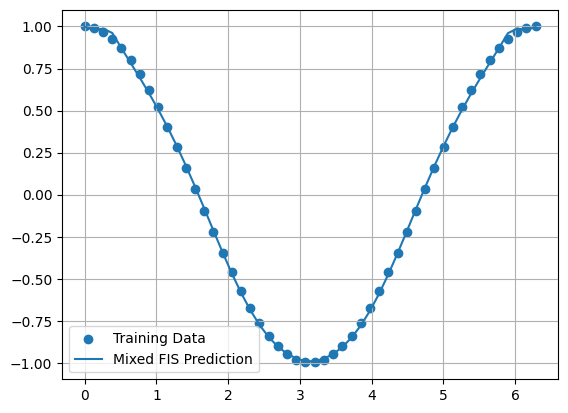

In [32]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis4(train_xs), label=f"{fis4.name} Prediction")
plt.grid()
plt.legend()
plt.show()

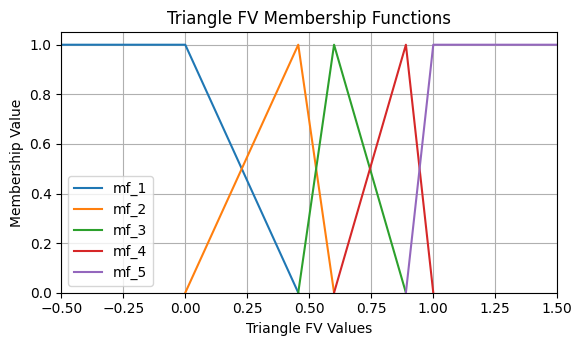

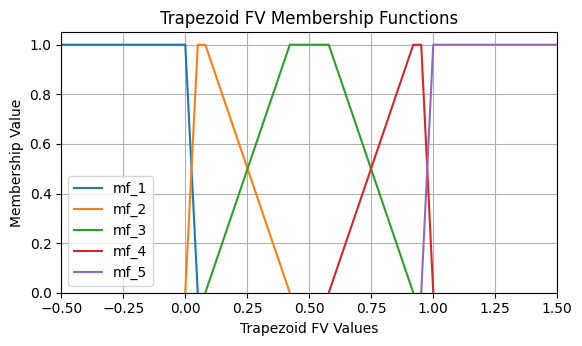

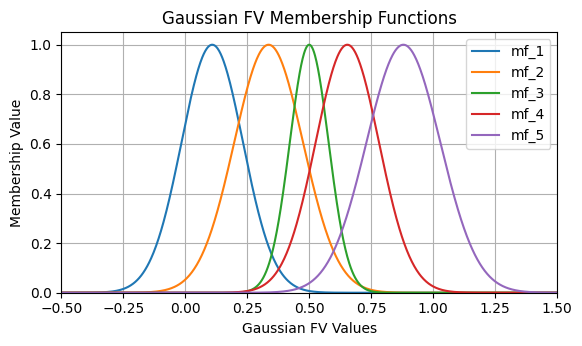

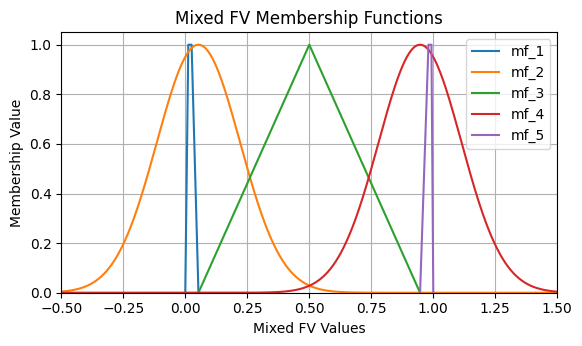

In [33]:
plot_mfs(fis1.input_vars[0])
plot_mfs(fis2.input_vars[0])
plot_mfs(fis3.input_vars[0])
plot_mfs(fis4.input_vars[0])

In [34]:
def count_parameters(model: eqx.Module) -> int:
    leaves = jax.tree_util.tree_leaves(
        eqx.filter(model, eqx.is_array)
    )
    return sum(leaf.size for leaf in leaves)

In [35]:
count_parameters(fis1)

14

In [36]:
count_parameters(fis2)

17

In [37]:
count_parameters(fis3)

21

In [38]:
count_parameters(fis4)

20